Créé le 19 mars 2021

**Projet Tableau de Bord** 

**Groupe n°3 - Arnaques en ligne**

**Visualisation des données**


@authors:
- Théo VEDIS
- Valentine ROSSI 
- MANSON Marianne
- KIRED Nour Elhouda





#### Import libraries

In [ ]:
########## Module import ##########

# Fichiers
import pandas as pd

# Math 
import numpy as np

# base de données 
from sqlalchemy import create_engine

# Warnings 
import warnings
warnings.filterwarnings('ignore')

# visualisation 
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


### Connection avec la base de données 

In [ ]:
username: str = ""
password : str= ""
adresseBD : str = "oracle://" + username + ":" + password + "@telline.univ-tlse3.fr:1521/etupre"
engine = create_engine(adresseBD, max_identifier_length=128)

### Recuperation et visulisation des données 

****
- **Evolution de l'intérêt des différents types d'arnaques dans le temps**

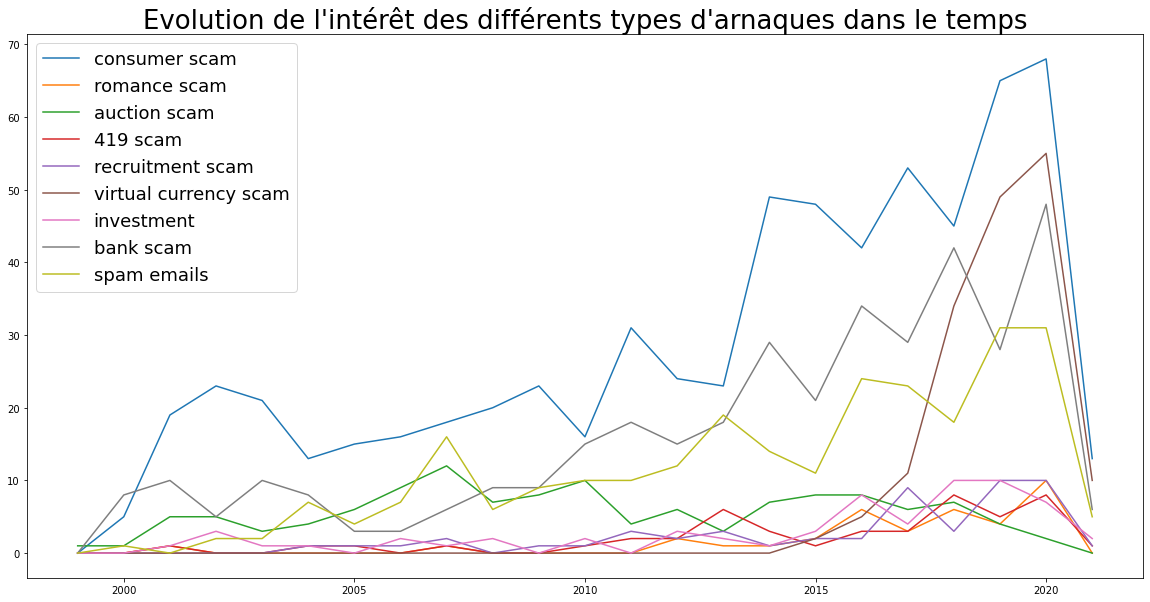

In [ ]:
# Recuperation des données
with engine.connect() as con:
    rs = con.execute(
        "select * from VIEW_TYPEARNAQUE_TEMPS"
    )
rs : pd.DataFrame = pd.DataFrame(rs)
type_scam : set = set(rs[0])

# visualisation 
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

for j in type_scam:
    if j != 'others':
        x = rs[rs[0] == j]
        l : list = []
        for i in np.arange(1999, 2022):
            val = list(x[x[1] == str(i)][2])
            if len(val) == 1:
                l.append(val[0])
            else:
                l.append(0)
        plt.plot(np.arange(1999, 2022), l, label=j)
plt.title("Evolution de l'intérêt des différents types d'arnaques dans le temps", fontdict={'fontsize':26})
plt.legend(prop={'size':18})
plt.savefig('test.png')
plt.show()

****
- **Proportion des types d'arnaques par tranche d'années**

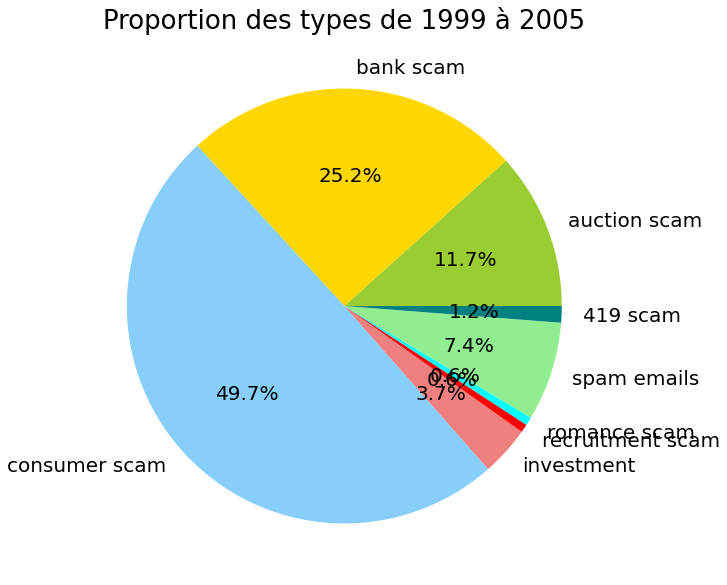

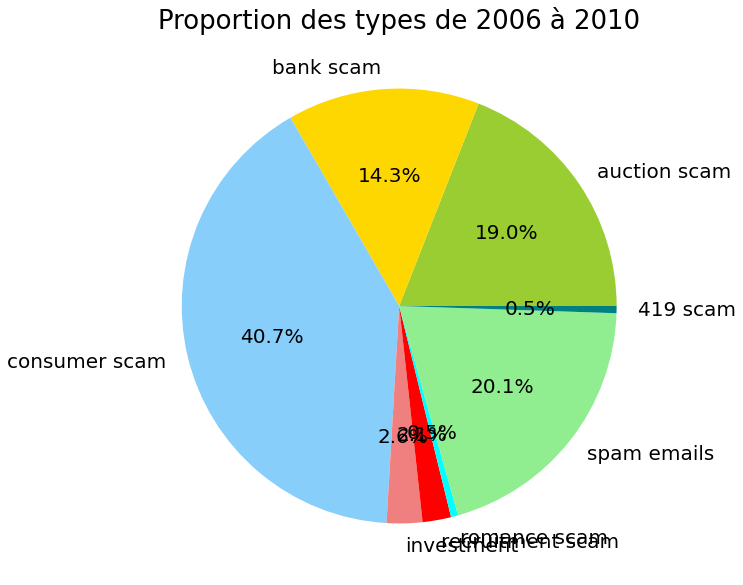

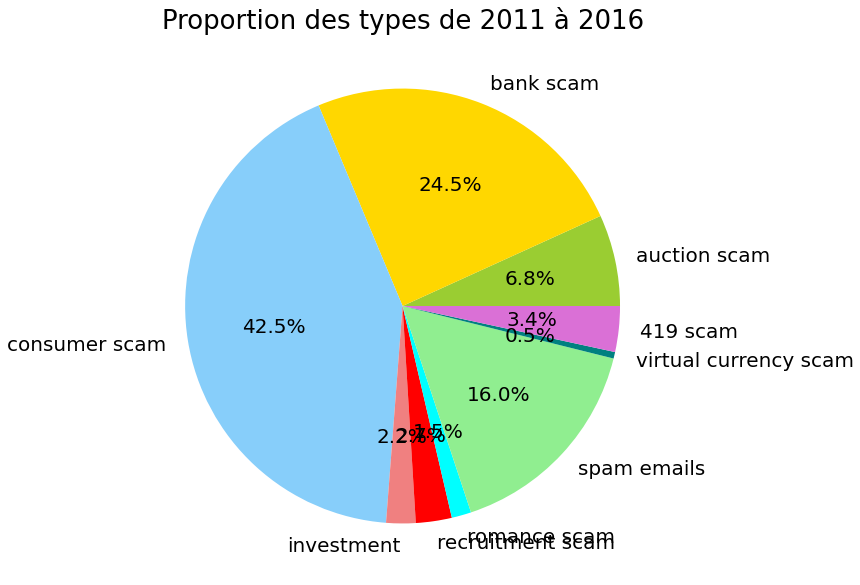

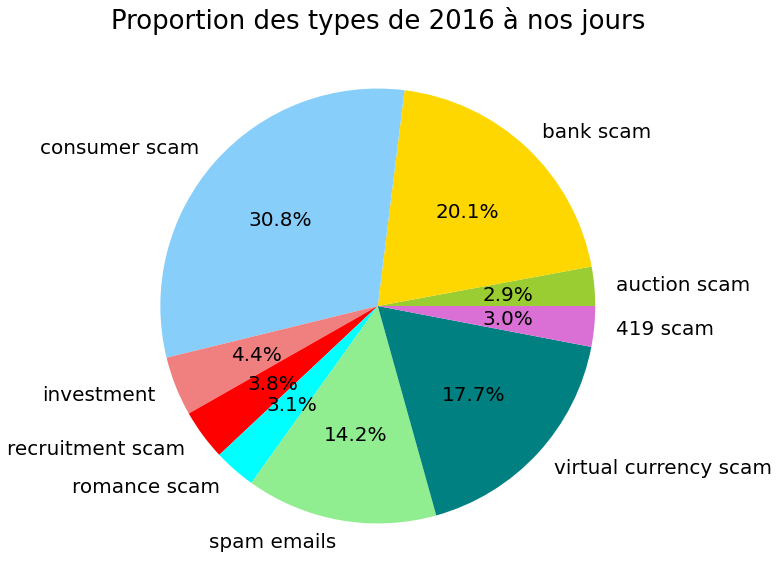

In [ ]:
# Parametres de l'affichage 
colors : list= ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'cyan', 'lightgreen', 'teal', 'orchid']
global_arg: dict = {"autopct":'%1.1f%%', "colors":colors, "textprops":{'size':20}}
# type d'arnaque entre  1999 et 2005
# Recuperation des données

year : str= "1999"
year2 : str= "2005"
with engine.connect() as con:
    rs = con.execute(
        "select type_arnaque, sum(nb_arnaque) from VIEW_TYPEARNAQUE_TEMPS where annee_arnaque >= '"
        + year
        + "' AND annee_arnaque < '"
        + year2
        + "' AND type_arnaque != 'others' GROUP BY (type_arnaque)"
        + " ORDER BY (type_arnaque)"
    )

# Visualisation des données 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

l : list = list(rs)
labels, sizes = list(zip(*l))
plt.pie(sizes, labels=labels, **global_arg)
plt.title("Proportion des types de " + year + " à " + year2, fontdict={'fontsize':26})
# Sauvegarde des  diagrammes circulaires
#plt.savefig('cam19992005.png')
plt.show()

####################################################################################################################################


# type d'arnaque entre  2006 et 2010
# Recuperation des données
year: str = "2006"
year2 : str = "2010"
with engine.connect() as con:
    rs = con.execute(
        "select type_arnaque, sum(nb_arnaque) from VIEW_TYPEARNAQUE_TEMPS where annee_arnaque >= '"
        + year
        + "' AND annee_arnaque < '"
        + year2
        + "' AND type_arnaque != 'others' GROUP BY (type_arnaque)"
        + " ORDER BY (type_arnaque)"
    )


# Visualisation des données 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

l : list = list(rs)
labels, sizes = list(zip(*l))
plt.pie(sizes, labels=labels, **global_arg)
plt.title("Proportion des types de " + year + " à " + year2, fontdict={'fontsize':26})
#plt.savefig('cam20062010.png')
plt.show()

####################################################################################################################################

# type d'arnaque entre  2011 et 2016
# Recuperation des données
year : str= "2011"
year2 : str = "2016"
with engine.connect() as con:
    rs = con.execute(
        "select type_arnaque, sum(nb_arnaque) from VIEW_TYPEARNAQUE_TEMPS where annee_arnaque >= '"
        + year
        + "' AND annee_arnaque < '"
        + year2
        + "' AND type_arnaque != 'others' GROUP BY (type_arnaque)"
        + " ORDER BY (type_arnaque)"
    )

# Visualisation des données 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

l : list = list(rs)
labels, sizes = list(zip(*l))
plt.pie(sizes, labels=labels, **global_arg)
plt.title("Proportion des types de " + year + " à " + year2, fontdict={'fontsize':26})
#plt.savefig('cam20112015.png')
plt.show()

####################################################################################################################################

# type d'arnaque entre  2016 et 2022
# Recuperation des données

year : str = "2016"
year2 : str = "2022"
with engine.connect() as con:
    rs = con.execute(
        "select type_arnaque, sum(nb_arnaque) from VIEW_TYPEARNAQUE_TEMPS where annee_arnaque >= '"
        + year
        + "' AND annee_arnaque < '"
        + year2
        + "' AND type_arnaque != 'others' GROUP BY (type_arnaque)"
        + " ORDER BY (type_arnaque)"
    )

# Visualisation des données 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

l : list = list(rs)
labels, sizes = list(zip(*l))
plt.pie(sizes, labels=labels, **global_arg)
plt.title("Proportion des types de 2016 à nos jours", fontdict={'fontsize':26})
#plt.savefig('cam2016Today.png')
plt.show()

****
- **Evolution du theme des articles dans le temps**

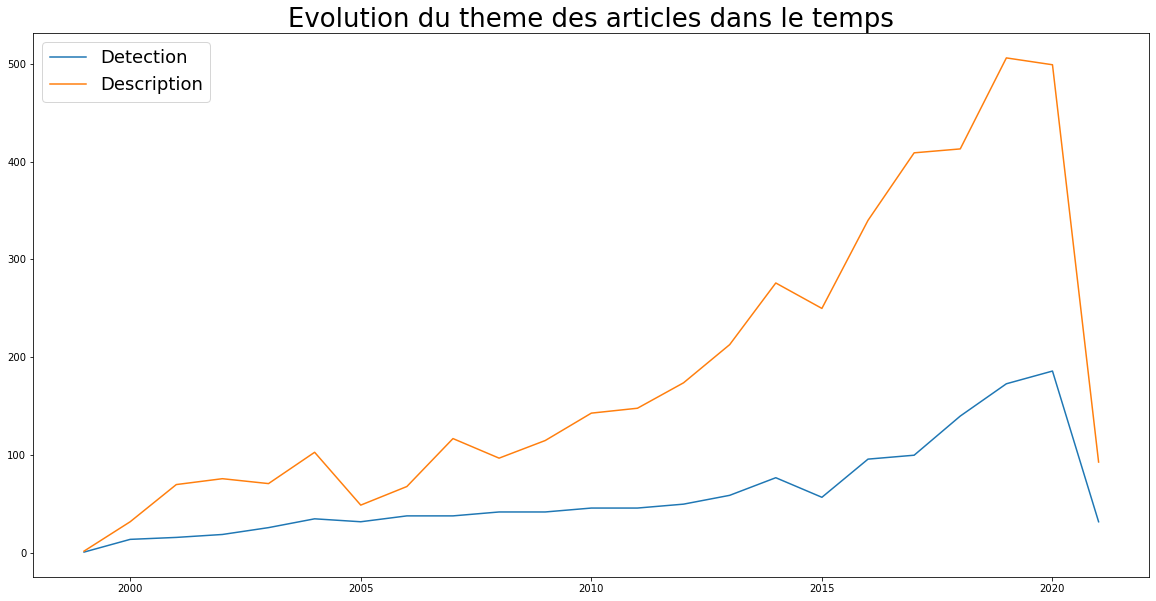

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
# Recuperation des données {Evolution du theme "detection" dans le temps}
with engine.connect() as con:
    rs = con.execute(
        "select annee_arnaque, nb_arnaque from VIEW_THEMEARNAQUE_TEMPS WHERE theme = 'detection'"
        + " ORDER BY annee_arnaque"
    )
l : list = list(rs)
annee, val = list(zip(*l))

# Visualisation 
plt.plot(np.arange(1999, 2022), val, label="Detection")

# Recuperation des données {Evolution du theme "description" dans le temps}

with engine.connect() as con:
    rs = con.execute(
        "select annee_arnaque, nb_arnaque from VIEW_THEMEARNAQUE_TEMPS WHERE theme = 'description'"
        + " ORDER BY annee_arnaque"
    )
l : list = list(rs)
annee, val = list(zip(*l))
# Visualisation 

plt.plot(np.arange(1999, 2022), val, label="Description")
plt.title("Evolution du theme des articles dans le temps", fontdict={'fontsize':26})
plt.legend(prop={'size':18})
plt.savefig("ThemeEvoluTemps.png")
plt.show()


 ** **
- **Mot-clefs les plus frequents avec le theme detection**

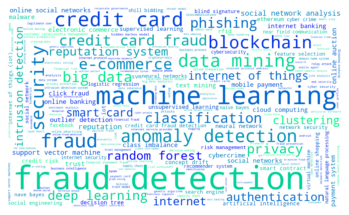

In [ ]:
# Recuperation des données 
with engine.connect() as con:
    rs = con.execute(
        "select LOWER(motclef), sum(nb_motclef) from VIEW_MOTCLEF_DETECTION"
        + " GROUP BY LOWER(motclef)"
    )
rs : list  = list(rs)
kw: dict = {i[0]:i[1] for i in rs}
# print(sorted(rs, key=lambda x: -x[1])[:10])



# Visualisation 

# mask = np.array(Image.open("ovale_mask.png")) # Forme ovale
wc = WordCloud(background_color="white", mask=None, width=1000, height=600, contour_width=0, colormap="winter")
wc.generate_from_frequencies(kw)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("wcDetection.png")

****
- **Mot-clefs les plus frequents avec le theme description**

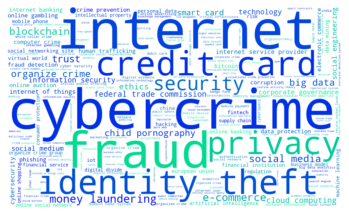

In [ ]:
# Recuperation des données 
with engine.connect() as con:
    rs = con.execute(
        "select LOWER(motclef), sum(nb_motclef) from VIEW_MOTCLEF_DESCRIPTION"
        + " GROUP BY LOWER(motclef)"
    )
rs : list = list(rs)
kw : dict= {i[0]:i[1] for i in rs}

# print(sorted(rs, key=lambda x: -x[1])[:10])


# Visualisation 

# mask = np.array(Image.open("ovale_mask.png")) # Forme ovale
wc = WordCloud(background_color="white", mask=None, width=1000, height=600, contour_width=0, colormap="winter")
wc.generate_from_frequencies(kw)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("wcDescription.png")

****
- **Proportion des nombres d'articles par pays et tranche d'annes**

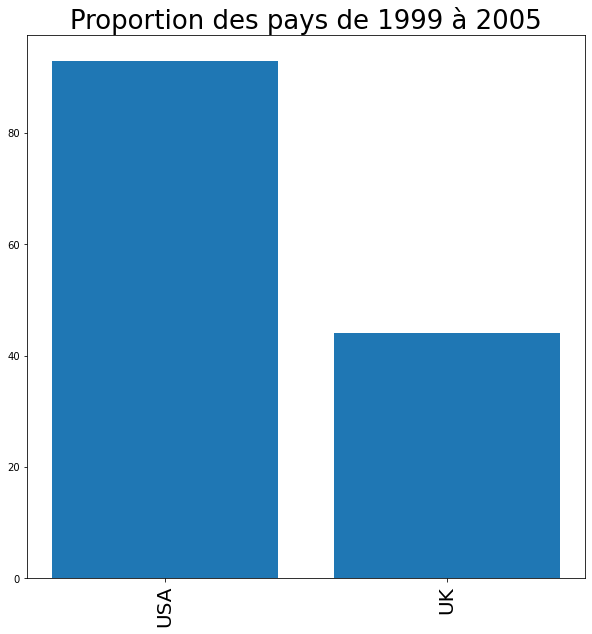

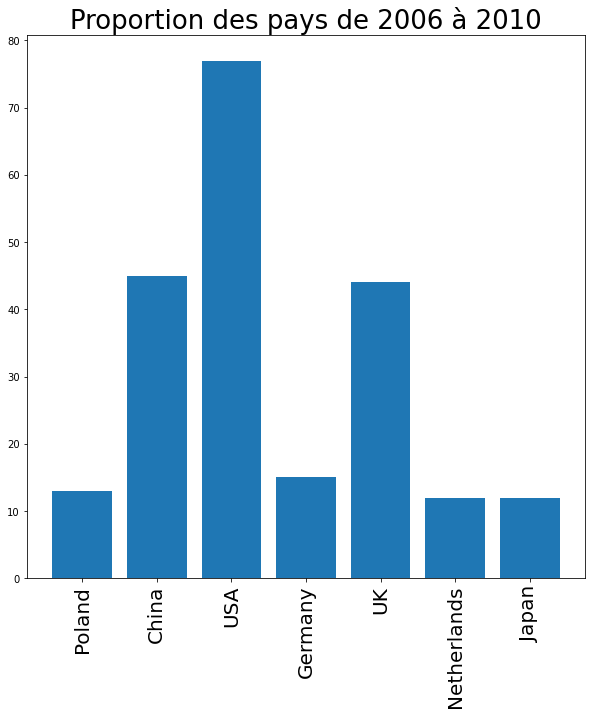

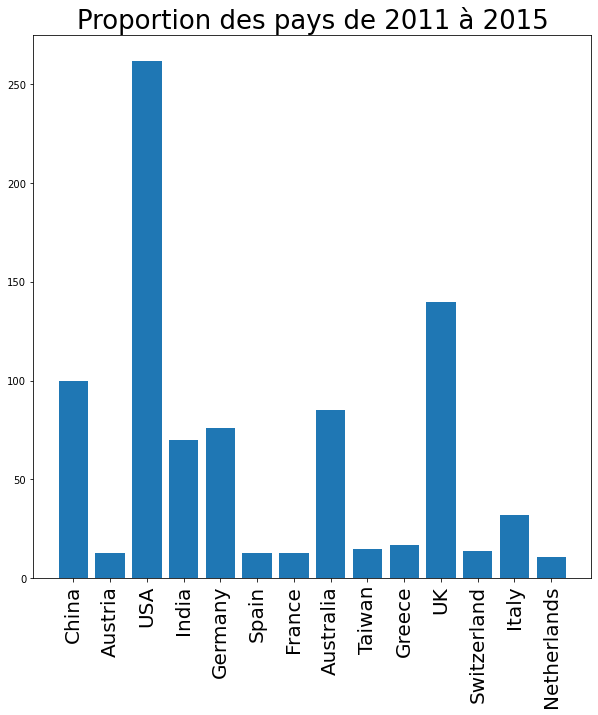

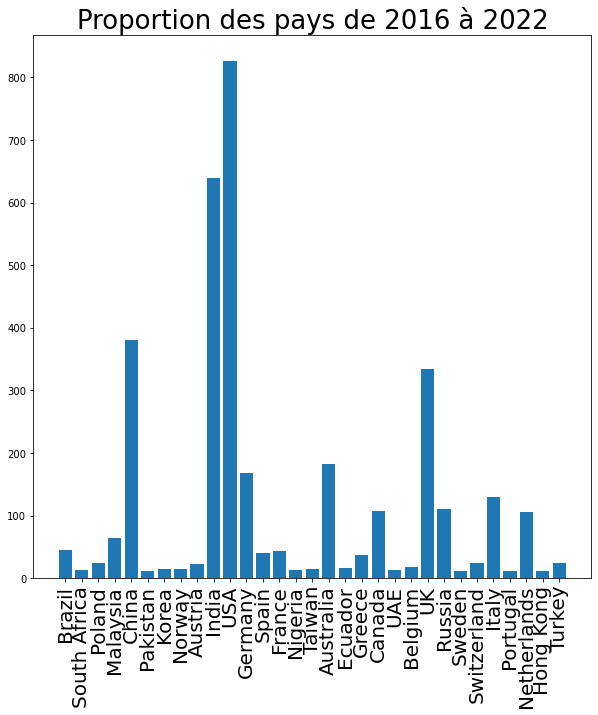

In [ ]:
years: list = [('1999', '2005'), ('2006', '2010'), ('2011', '2015'), ('2016', '2022')]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'cyan', 'lightgreen', 'teal', 'orchid']
global_arg : dict = {"textprops":{'size':20}}

# Recuperation des données 
for year1, year2 in years:
    with engine.connect() as con:
        rs = con.execute(
            "select pays, sum(nb_article) from VIEW_PAYS_ARTICLE_TEMPS"
            + " WHERE annee > " + year1 + " and annee < " + year2
            + " GROUP BY (pays)"
        )
        l = list(rs)
    # Visualisation 

    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(10)

    labels, sizes = list(zip(*l))
    # plt.pie(sizes, labels=labels, **global_arg)
    plt.bar(x=labels, height=sizes)
    plt.title("Proportion des pays de " + year1 + " à " + year2, fontdict={'fontsize':26})
    plt.xticks(rotation='vertical', size=20)
    plt.savefig('camPays'+ year1 + year2 +'.png')
    plt.show()

****
- **Proportion d'article par pays et par theme**

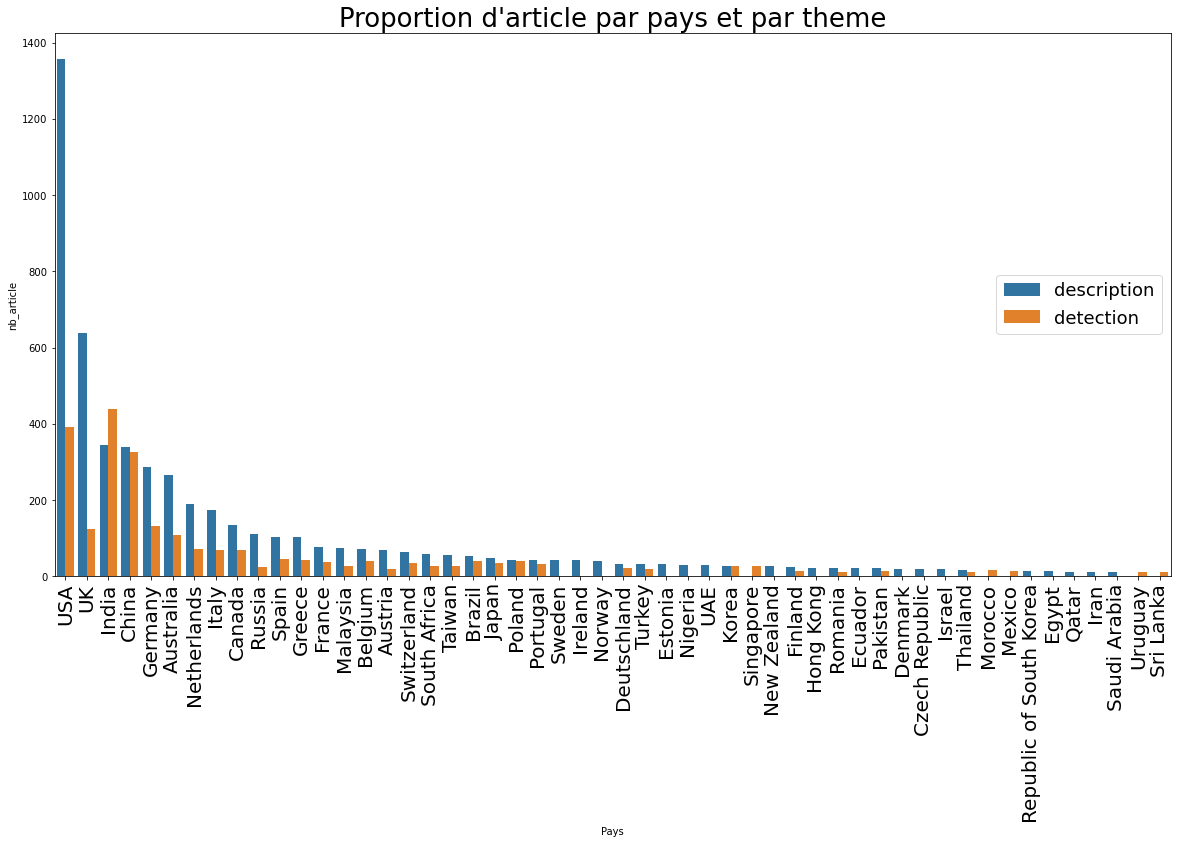

In [ ]:
# Recuperation des données 
with engine.connect() as con:
    rs = con.execute(
        "select pays, theme, nb_article from VIEW_PAYS_ARTICLE_theme"
        + " ORDER BY nb_article DESC"
    )
    rs : list  = list(rs)
# Visualisation 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
sns.barplot(x="Pays", y="nb_article", hue="Theme", data=pd.DataFrame(rs, columns=["Pays", "Theme", "nb_article"]), )
plt.xticks(rotation='vertical', size=20)
plt.legend(prop={'size':18}, loc='right')
plt.title("Proportion d'article par pays et par theme", fontdict={'fontsize':26})
plt.show()

**** 
**Mot-clefs des articles par tranche d'années**

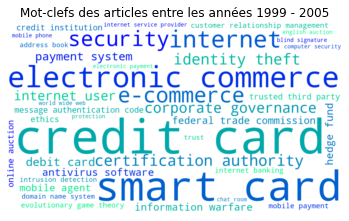

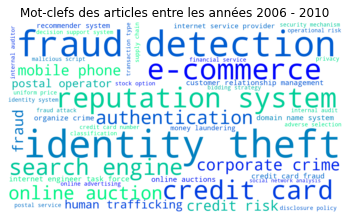

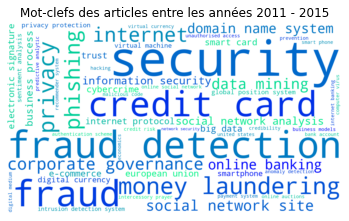

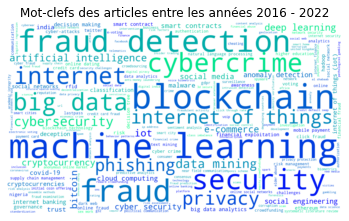

In [ ]:
# Recuperation des données 
years : list = [('1999', '2005'), ('2006', '2010'), ('2011', '2015'), ('2016', '2022')]
for year1, year2 in years:
    with engine.connect() as con:
        rs = con.execute(
            "select  LOWER(motclef), SUM(nb_occur) from (SELECT v1.motclef as motclef, v1.annee_arnaque as annee, v1.nb_motclef + v2.nb_motclef as nb_occur from VIEW_MOTCLEF_DESCRIPTION v1, VIEW_MOTCLEF_DETECTION v2 where v1.motclef = v2.motclef and v1.annee_arnaque = v2.annee_arnaque)"
            + " WHERE annee > " + year1 + " AND annee < " + year2
            + " GROUP BY LOWER(motclef)"
            + " ORDER BY SUM(nb_occur) DESC"
        )
        rs : list = list(rs)
    kw : dict = {i[0]:i[1] for i in rs}

    # Visualisation 

    wc = WordCloud(background_color="white", width=1400, height=800, contour_width=0, colormap="winter")
    wc.generate_from_frequencies(kw)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Mot-clefs des articles entre les années " + year1 + " - " + year2)
    plt.show()
    wc.to_file("wcParYear" + year1 + "-" + year2 + ".png")


In [ ]:
# rs.to_csv("./REQUEST_VIEW_TYPEARNAQUE_TEMPS.csv")